# Bank Loan Prediction:- using Decision Tree Algorithm

In this data set from kaggle, I am supposed to predict wheather a person will be able to pay their load back using machine learning algorithms/ models.

### Machine Learning: k-clusering

* 1 - Ingest / upload the data set.
* 2 - Clean, remove the na values.
* 3 - Choose the right attributes that you want to use.
* 4 - Scale the features so that they can be represented properly.
* 5 - Invoke the k-means closer
* 6 - Check clusters (optional)


### Decision Trees:-
* 1 - Import the right dependencies
* 2 - Ingest the data you are going to use
* 3 - Drop the na rows
* 4 - The prediction model follows function y = f(x) meaning x are training and y the results
* 5 - We need to choose the appropriate features to use for training and predictions.
* 6 - Split the data into the right test and train data
* 7 - Fit the test into the model and (call the model function incidence) #fit only X_train and  Y_train
* 8 - Predict the values now.
* 9 - In testing, use X_test and compare with y_test to see if the values are accurate
* 10 - Compare the Accuracy of the classifier

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [3]:
#I need to import the datasets 
test_data = pd.read_csv('./application_test.csv')
train_data = pd.read_csv('./application_train.csv')

In [4]:
#what variables does the data have:
test_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [5]:
#how many rows and columns do we have?
test_data.shape

(48744, 121)

In [6]:
test_data

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [7]:
#this is the provided training data, how many variables does it have.
train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#how many columns and rows do we have?
train_data.shape

(307511, 122)

In [10]:
#check for null values in test_data
test_data[test_data.isnull().any(axis = 1)]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [11]:
test_data = test_data.dropna()

In [12]:
#dropped the null values in the test data
test_data.shape

(1739, 121)

In [13]:
#dropping null values in the train data
train_data = train_data.dropna()

In [14]:
train_data.shape

(8602, 122)

In [15]:
train_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Dealing with categorical variables to factors

# NB: if you have na in data, the data type is considered float 

For example notice that the data types when I tried to convert to factors I used float because I have na or else I will get an error in my code.

In [16]:
#the map function functions on an iterable dataset and needs indexes to map
full_data = [train_data, test_data]


for dataset in full_data:
    #map the contract type
    dataset['NAME_CONTRACT_TYPE'] = dataset['NAME_CONTRACT_TYPE'].map({'Cash loans':1, 'Revolving loans':2}).astype(float)
    

In [17]:
for dataset in full_data:
    #map the gender
    dataset['CODE_GENDER'] = dataset['CODE_GENDER'].map({'M':1, 'F':0}).astype(float)
    dataset['CODE_GENDER'] = dataset['CODE_GENDER'].fillna(0)

In [18]:
for dataset in full_data:
    #map the gender
    dataset['FLAG_OWN_CAR'] = dataset['FLAG_OWN_CAR'].map({'Y':1, 'N':0}).astype(float)
    dataset['FLAG_OWN_CAR'] = dataset['FLAG_OWN_CAR'].fillna(0)

In [19]:
for dataset in full_data:
    #map the income
    dataset['NAME_INCOME_TYPE'] = dataset['NAME_INCOME_TYPE'].map({'Working':1, 'Commercial associate':2}).astype(float)
    

In [20]:
#what are the unique values for family status
train_data['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Separated', 'Single / not married', 'Widow',
       'Civil marriage'], dtype=object)

In [21]:
for dataset in full_data:
    #map the income
    dataset['NAME_FAMILY_STATUS'] = dataset['NAME_FAMILY_STATUS'].map({'Married':1, 'Separated':2, 'Single/not married':3,'Widow':4}).astype(float)

In [22]:
for dataset in full_data:
    #map the income
    dataset['NAME_HOUSING_TYPE'] = dataset['NAME_HOUSING_TYPE'].map({'House / apartment':1, 'With parents':2}).astype(float)

In [23]:
#what are the unique values for occupation
train_data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Managers', 'Drivers', 'Core staff', 'Sales staff',
       'High skill tech staff', 'Medicine staff', 'Accountants',
       'Private service staff', 'Cooking staff', 'HR staff',
       'Cleaning staff', 'Security staff', 'Secretaries', 'IT staff',
       'Realty agents', 'Waiters/barmen staff', 'Low-skill Laborers'],
      dtype=object)

In [24]:
for dataset in full_data:
    #map the income
    dataset['OCCUPATION_TYPE'] = dataset['OCCUPATION_TYPE'].map({'Laborers':1, 'Managers':2, 
                                                                 'Drivers':3,'Core staff':4,'Sales staff':5,
                                                                'High skill tech staff':6,
                                                                'Medicine staff':7,'Accountants':8,'Private service staff':9
                                                                ,'Cooking staff':10,'HR staff':11,'Cleaning staff':12,'Security staff':13
                                                                , 'Secretaries':14,'IT staff':15,'Realty agents':16,'Waiters/barmen staff':17,
                                                                'Low-skill Laborers':18}).astype(float)

In [25]:
for dataset in full_data:
    dataset['FLAG_OWN_REALTY'] = dataset['FLAG_OWN_REALTY'].map({'Y':1, 'N':0}).astype(float)

In [26]:
#there are some empty values
sum(train_data.isnull().any())

3

In [27]:
#choose the features that I want to use in my analysis
features = [
    'SK_ID_CURR','NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS'
 ]

In [28]:
y = train_data[['TARGET']]

In [29]:
#I take the features I want from the train data
X = train_data[features].copy().dropna()

In [30]:
X.info()#all the data is now in float data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 71 to 307482
Data columns (total 18 columns):
SK_ID_CURR                    5782 non-null int64
NAME_CONTRACT_TYPE            5782 non-null float64
CODE_GENDER                   5782 non-null float64
FLAG_OWN_CAR                  5782 non-null float64
FLAG_OWN_REALTY               5782 non-null float64
CNT_CHILDREN                  5782 non-null int64
AMT_INCOME_TOTAL              5782 non-null float64
AMT_CREDIT                    5782 non-null float64
AMT_ANNUITY                   5782 non-null float64
AMT_GOODS_PRICE               5782 non-null float64
NAME_INCOME_TYPE              5782 non-null float64
NAME_FAMILY_STATUS            5782 non-null float64
NAME_HOUSING_TYPE             5782 non-null float64
REGION_POPULATION_RELATIVE    5782 non-null float64
DAYS_EMPLOYED                 5782 non-null int64
DAYS_REGISTRATION             5782 non-null float64
OCCUPATION_TYPE               5782 non-null float64
CNT_FAM_MEMB

In [31]:
#y head? these are the kind of results we want to demonstrate
#whether a person will be able to pay or not.
y.head()

,TARGET
71,0
124,0
152,0
161,0
255,1


In [32]:
#any values empty in y
sum(y.isnull().any())

0

In [33]:
#no more empty columns
sum(X.isnull().any())

0

In [34]:
X.shape

(5782, 18)

In [35]:
y.shape

(8602, 1)

In [36]:
y = y.head(5782)# I am choosing this so that I don't have a miss match in the dimension of the data.

## Splitting the data

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [38]:
#lets see what the train data looks like
X_train
#all the data should now be in floating point
#why? float? because its the data type that can also take nan values

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS
271996,415331,1.0,0.0,1.0,1.0,2,225000.0,720000.0,25636.5,720000.0,1.0,1.0,1.0,0.010032,-681,-1348.0,6.0,4.0
96262,211758,1.0,1.0,1.0,1.0,0,265500.0,755190.0,38686.5,675000.0,1.0,1.0,1.0,0.002042,-1608,-7077.0,6.0,2.0
131230,252204,1.0,0.0,1.0,0.0,0,382500.0,594000.0,17365.5,594000.0,1.0,1.0,1.0,0.010006,-2336,-4305.0,16.0,2.0
91139,205841,1.0,0.0,1.0,1.0,0,112500.0,152820.0,16047.0,135000.0,1.0,1.0,1.0,0.003813,-2196,-5700.0,8.0,2.0
65457,175912,1.0,0.0,1.0,1.0,2,90000.0,651600.0,36513.0,562500.0,1.0,1.0,1.0,0.031329,-159,-5664.0,10.0,4.0
30837,135795,1.0,0.0,1.0,0.0,0,585000.0,1436850.0,39640.5,1125000.0,2.0,2.0,1.0,0.031329,-1494,-5684.0,2.0,1.0
180867,309609,1.0,0.0,1.0,1.0,0,337500.0,675000.0,45108.0,675000.0,2.0,1.0,2.0,0.032561,-619,-1137.0,2.0,2.0
9168,110661,1.0,1.0,1.0,1.0,0,202500.0,585000.0,21141.0,585000.0,1.0,1.0,1.0,0.010500,-2272,-3776.0,4.0,2.0
171033,298220,2.0,1.0,1.0,1.0,1,202500.0,540000.0,27000.0,540000.0,2.0,1.0,1.0,0.025164,-1017,-3611.0,1.0,3.0
108677,226053,1.0,1.0,1.0,1.0,0,135000.0,679500.0,36333.0,679500.0,1.0,1.0,1.0,0.025164,-1448,-20.0,1.0,2.0


In [39]:
loan_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
loan_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
predictions = loan_classifier.predict(X_test)

In [41]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
y_test[:20]

,TARGET
126843,0
116819,0
42701,0
179758,0
80800,0
151998,0
61026,0
146664,0
190954,0
1238,0


In [44]:
#the accuracy of the predictions?
accuracy_score(y_test,predictions)*100

93.2425353588266

# Using K-means clustering for the information above:

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [46]:
features

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [47]:
 select_data = train_data[features].copy().dropna()

In [48]:
#scaling the  variable such taht they will be able to be used by the model
X = StandardScaler().fit_transform(select_data)
X

array([[-1.72888263, -0.35093393,  0.95998366, ...,  1.24391458,
        -0.91568939, -0.67620458],
       [-1.72828547, -0.35093393, -1.0416844 , ...,  1.10857104,
        -0.91568939, -0.67620458],
       [-1.727958  , -0.35093393, -1.0416844 , ...,  1.29567304,
        -0.60817263, -0.67620458],
       ...,
       [ 1.70050603, -0.35093393, -1.0416844 , ..., -1.63237672,
         0.31437765,  0.48777722],
       [ 1.70103576, -0.35093393, -1.0416844 , ..., -0.40817673,
         2.46699497, -0.67620458],
       [ 1.70133434, -0.35093393, -1.0416844 , ...,  0.56173171,
        -0.60817263, -0.67620458]])

In [49]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [50]:
#this shows the centers that have been chosen over the datasets
centers = model.cluster_centers_
centers

array([[ 0.0190453 ,  0.16128021,  0.00325235,  0.        ,  0.01528131,
         0.08999934, -0.26738265, -0.57841508, -0.52502199, -0.57799435,
        -0.1362318 ,  0.01451369,  0.02132393, -0.13414156,  0.05299365,
         0.0516383 ,  0.01201527,  0.07807073],
       [-0.03382072, -0.28640207, -0.00577553,  0.        , -0.02713661,
        -0.1598212 ,  0.47481922,  1.02715189,  0.93233621,  1.02640475,
         0.24192099, -0.02577347, -0.03786712,  0.23820914, -0.09410634,
        -0.09169951, -0.02133676, -0.13863833]])

In [51]:
# we want to create a dataframe with the information we have:
def my_frame(features, centers):
    colNames = list(features) #add as column names the features
    colNames.append('TARGET') # add the column name target also
    
    #now we want to add index
    Z = [
        np.append(index, ft)
        for index, ft in enumerate(centers)
    ]
    
    #convert the data into a pandas array
    P = pd.DataFrame( Z, columns = colNames)
    P['TARGET'] = P['TARGET'].astype(float)
    return P

In [52]:
P = my_frame(features, centers)
P

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,0.0,0.019045,0.161280,0.003252,0.0,0.015281,0.089999,-0.267383,-0.578415,-0.525022,-0.577994,-0.136232,0.014514,0.021324,-0.134142,0.052994,0.051638,0.012015,0.078071
1,1.0,-0.033821,-0.286402,-0.005776,0.0,-0.027137,-0.159821,0.474819,1.027152,0.932336,1.026405,0.241921,-0.025773,-0.037867,0.238209,-0.094106,-0.091700,-0.021337,-0.138638


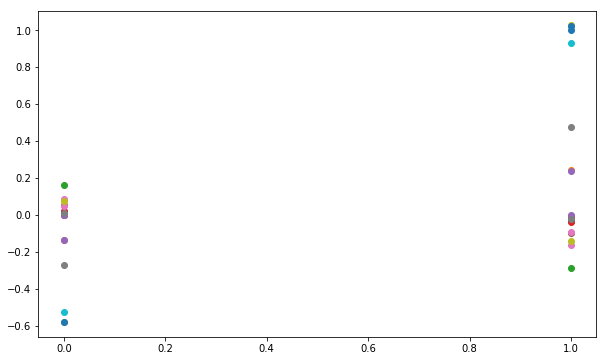

In [53]:
#lets see the plots
plt.figure(figsize=(10,6))
plt.plot(P,'o')